# 3. laboratorijska vježba
### Pasivni visoko-propusni filtri

Realizacija visoko-propusnog filtra u ovom slučaju se ostvaruje korištenjem otpornika i zavojnice povezanih u seriju, pri čemu se izlaz promatra kao napon na zavojnici, $V_{out}$ Uz pretpostavku da je signal na ulazu, $V_{in}$, sinusoidalni naponski izvor, analizu možemo prebaciti u frekvencijsku domenu koristeći impedancijski model. Na ovaj način izbjegavamo potrebu za korištenjem diferencijalnog računa i čitav proračun se svodi na jednostavni algebarski problem. 

<img src="static/rl-highpass.png" alt="simple-rl-highpass" width="400"/>

Izraz za funkciju prijenosnog odziva dobijamo kao omjer izlaznog i ulaznog napona. Izlazni napon - napon na zavojnici, $V_{out}$, definiramo kroz podjelu ulaznog napona na sljedeći način:

$$
\begin{align}
    V_{out} &= \frac{Z_l}{Z_l + Z_r} \cdot V_{in} \\
    H(\omega) = \frac{V_{out}}{V_{in}} &= \frac{Z_l}{Z_l + Z_r} = \frac{j\omega L}{j\omega L + R} = \frac{1}{1+R/(j\omega L)}
\end{align}
$$

Kako je $H$ funkcija frekvencije, imamo dva ruba slučaja:
* za iznimno niske frekvencije kada je $\omega \sim 0$ slijedi da je $H(\omega) \rightarrow 0$;
* za iznimno visoke frekvencije kada $\omega \rightarrow \infty$ slijedi da je $H(\omega) = 0$.

Potrebno je dodatno definirati već spomenutu *cut-off* frekvenciju, $f_c$, za koju amplituda funkcije frekvencijskog odziva, $H$, pada za $\sqrt 2$ puta, odnosno za $3$ dB:
$$
\begin{align}
    f_c &= \frac{R}{2 \pi L}
\end{align}
$$

Link za interaktivni rad sa pasivnim visoko-propusnim filtrom: http://sim.okawa-denshi.jp/en/LRtool.php

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def rl_highpass(R, L, f):
    return 1/(1+1/(1.0j*2*np.pi*f*L/R))

In [3]:
# configuration
R = 200
L = 100e-3
f = np.linspace(0.1, 10000, num=10000)
omega = 2*np.pi*f
f_cutoff = R/(2*np.pi*L)
omega_cutoff = 2*np.pi*f_cutoff

print(f'R = {R/1000} kΩ')
print(f'L = {L*1000} mH')
print(f'frequency range = [{f.min()}-{f.max()}] Hz')
print(f'frequency cut-off = {round(f_cutoff, 1)} Hz')

R = 0.2 kΩ
L = 100.0 mH
frequency range = [0.1-10000.0] Hz
frequency cut-off = 318.3 Hz


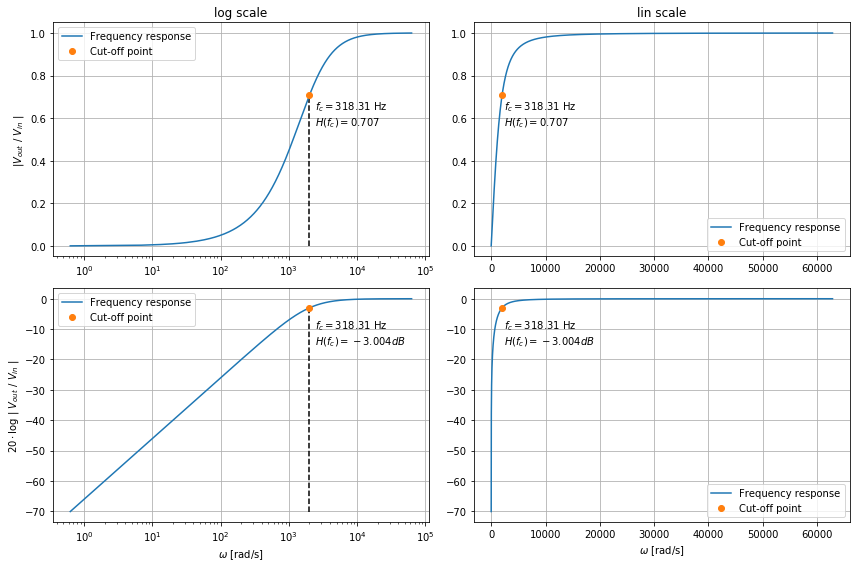

In [4]:
H = np.abs(rl_highpass(R, L, f))
H_db = 20*np.log10(H)

### visualization
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

## absolutue value of frequency response function
# shown in log scale
ax[0,0].plot(omega, H, label='Frequency response')
ax[0,0].plot(omega_cutoff, 1/np.sqrt(2), 'o', label='Cut-off point')
ax[0,0].vlines(omega_cutoff, H.min(), 1/np.sqrt(2), linestyle='--')
ax[0,0].annotate(f'$f_c = {round(f_cutoff, 3)}$ Hz\n$H(f_c)={round(1/np.sqrt(2), 3)}$', (omega_cutoff*1.2, 1/np.sqrt(2)*0.8))
ax[0,0].set_xscale('log')
ax[0,0].set_ylabel('$| V_{out}$ / $V_{in}$ |')
ax[0,0].set_title('log scale')
ax[0,0].legend()
ax[0,0].grid()
# shown in lin scale
ax[0,1].plot(omega, H, label='Frequency response')
ax[0,1].annotate(f'$f_c = {round(f_cutoff, 3)}$ Hz\n$H(f_c)={round(1/np.sqrt(2), 3)}$', (omega_cutoff*1.2, 1/np.sqrt(2)*0.8))
ax[0,1].plot(omega_cutoff, 1/np.sqrt(2), 'o', label='Cut-off point')
ax[0,1].set_title('lin scale')
ax[0,1].legend()
ax[0,1].grid()
## frequency response function in dB
# shown in log scale
ax[1,0].plot(omega, H_db, label='Frequency response')
ax[1,0].vlines(omega_cutoff, H_db.min(), H_db.max()-3, linestyle='--')
ax[1,0].annotate(f'$f_c = {round(f_cutoff, 3)}$ Hz\n$H(f_c)={round(H_db.max()-3, 3)} dB$', (omega_cutoff*1.2, (H_db.max()-3)*5))
ax[1,0].plot(omega_cutoff, H_db.max()-3, 'o', label='Cut-off point')
ax[1,0].set_xscale('log')
ax[1,0].set_xlabel('$\\omega$ [rad/s]')
ax[1,0].set_ylabel('$20 \\cdot \\log$ | $V_{out}$ / $V_{in}$ |')
ax[1,0].legend()
ax[1,0].grid()
# shown in lin scale
ax[1,1].plot(omega, H_db, label='Frequency response')
ax[1,1].annotate(f'$f_c = {round(f_cutoff, 3)}$ Hz\n$H(f_c)={round(H_db.max()-3, 3)} dB$', (omega_cutoff*1.2, (H_db.max()-3)*5))
ax[1,1].plot(omega_cutoff, H_db.max()-3, 'o', label='Cut-off point')
ax[1,1].set_xlabel('$\\omega$ [rad/s]')
ax[1,1].legend()
ax[1,1].grid()

plt.tight_layout()
plt.show()

### Strujno-naponska karakteristika RL visoko-propusnog filtra

In [5]:
V = 5
I_peak = V/R
τ = L/R
switch_time = τ * 4.4
T = 2 * switch_time
t = np.linspace(0, T)

In [6]:
I = np.where(t < switch_time, I_peak*(1-np.exp((-R/L)*t)), I_peak*np.exp((-R/L)*(t-switch_time)))

In [7]:
f = 1/T
omega = 2*np.pi*f
i = I_peak*np.sin(omega*t)

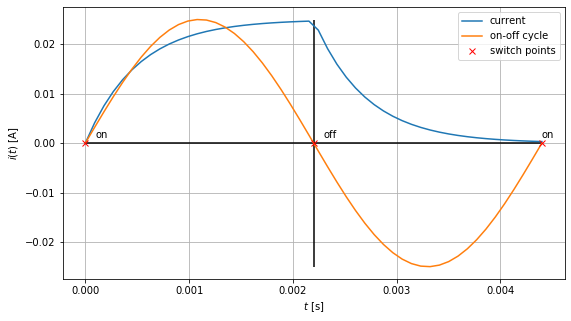

In [8]:
plt.figure(figsize=(9, 5))
plt.plot(t, I, label='current')
plt.plot(t, i, label='on-off cycle')
plt.plot([t.min(), switch_time, t.max()], [0, 0, 0], 'rx', label='switch points')
plt.text(t.min() + 1e-4, I.min() + 1e-3, 'on')
plt.text(switch_time + 1e-4, I.min() + 1e-3, 'off')
plt.text(t.max(), I.min() + 1e-3, 'on')
plt.hlines(0, t.min(), t.max())
plt.vlines(switch_time, i.min(), i.max())
plt.xlabel('$t$ [s]')
plt.ylabel('$i(t)$ [A]')
plt.legend()
plt.grid()
plt.show()

### Pojasno propusni filtri
Sljedeći kod koristi više različitih tipova pojasno-propusnih filtara (Hamming, Kaiser, Remez) i uspoređuje ih s idealnom prijenosnom funkcijom.

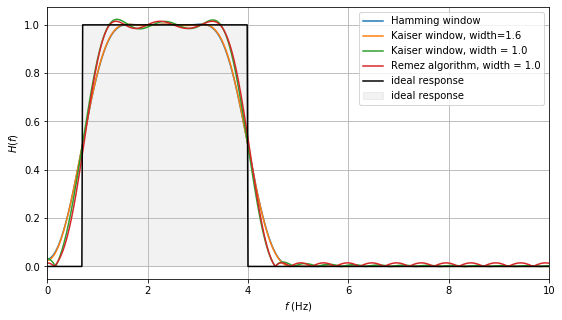

In [9]:
from scipy.signal import freqz
from scipy.signal import firwin, remez, kaiser_atten, kaiser_beta


def bandpass_firwin(ntaps, lowcut, highcut, fs, window='hamming'):
    nyq = 0.5 * fs
    taps = firwin(ntaps, [lowcut, highcut], nyq=nyq, pass_zero=False, window=window, scale=False)
    return taps


def bandpass_kaiser(ntaps, lowcut, highcut, fs, width):
    nyq = 0.5 * fs
    atten = kaiser_atten(ntaps, width / nyq)
    beta = kaiser_beta(atten)
    taps = firwin(ntaps, [lowcut, highcut], nyq=nyq, pass_zero=False, window=('kaiser', beta), scale=False)
    return taps

def bandpass_remez(ntaps, lowcut, highcut, fs, width):
    delta = 0.5 * width
    edges = [0, lowcut - delta, lowcut + delta, highcut - delta, highcut + delta, 0.5*fs]
    taps = remez(ntaps, edges, [0, 1, 0], Hz=fs)
    return taps


fs = 63.0
lowcut = 0.7
highcut = 4.0

ntaps = 128
taps_hamming = bandpass_firwin(ntaps, lowcut, highcut, fs=fs)
taps_kaiser16 = bandpass_kaiser(ntaps, lowcut, highcut, fs=fs, width=1.6)
taps_kaiser10 = bandpass_kaiser(ntaps, lowcut, highcut, fs=fs, width=1.0)
remez_width = 1.0
taps_remez = bandpass_remez(ntaps, lowcut, highcut, fs=fs, width=remez_width)

plt.figure(figsize=(9, 5))
w, h = freqz(taps_hamming, 1, worN=2000)
plt.plot(fs*0.5/np.pi*w, np.abs(h), label="Hamming window")

w, h = freqz(taps_kaiser16, 1, worN=2000)
plt.plot(fs*0.5/np.pi*w, np.abs(h), label='Kaiser window, width=1.6')

w, h = freqz(taps_kaiser10, 1, worN=2000)
plt.plot(fs*0.5/np.pi*w, np.abs(h), label='Kaiser window, width = 1.0')

w, h = freqz(taps_remez, 1, worN=2000)
plt.plot(fs*0.5/np.pi*w, np.abs(h), label=f'Remez algorithm, width = {remez_width}')

h = np.where((fs*0.5/np.pi*w < lowcut) | (fs*0.5/np.pi*w > highcut), 0, 1)
plt.plot(fs*0.5/np.pi*w, h, 'k-', label='ideal response')
plt.fill_between(fs*0.5/np.pi*w, h, color='gray', alpha=0.1, label='ideal response')

plt.xlim(0, 10.0)
plt.grid(True)
plt.legend(loc='upper right')
plt.xlabel('$f$ (Hz)')
plt.ylabel('$H(f)$')
plt.show()